<a href="https://colab.research.google.com/github/Catherine-6/ML_course/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Загружаем библиотеки для классификации изображений**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output
import matplotlib.pylab as pylab
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


**Устанавливаем размер изображений для анализа**

In [36]:
sample_size = 1000
width = 250
heigth = 250

**Добавляем картинки из двух папок: коты / не коты**

In [37]:
files = ['cats', 'notcats']
adress = '/content/drive/MyDrive/{}'
data = {}
for f in files:
  data[f]=[]
for col in files:
  os.chdir(adress.format(col))
  for i in os.listdir(os.getcwd()):
    if i.endswith('.png'):
      data[col].append(i)

In [38]:
start = time.time()
image_data = []
image_target = []

for title in files:
  os.chdir(adress.format(title))
  counter = 0
  for i in data[title]:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_data.append(cv2.resize(img,(width, heigth)))
    image_target.append(title)

    counter += 1
    if counter == sample_size:
      break
  clear_output(wait = True)
  print ("Complited Class", title)
calculate_time = time.time() - start
print ("Calculate time", round(calculate_time, 5))

Complited Class notcats
Calculate time 42.63538


In [39]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(1000, 250, 250, 3)

**Визуализируем данные в виде таблицы 4×4**

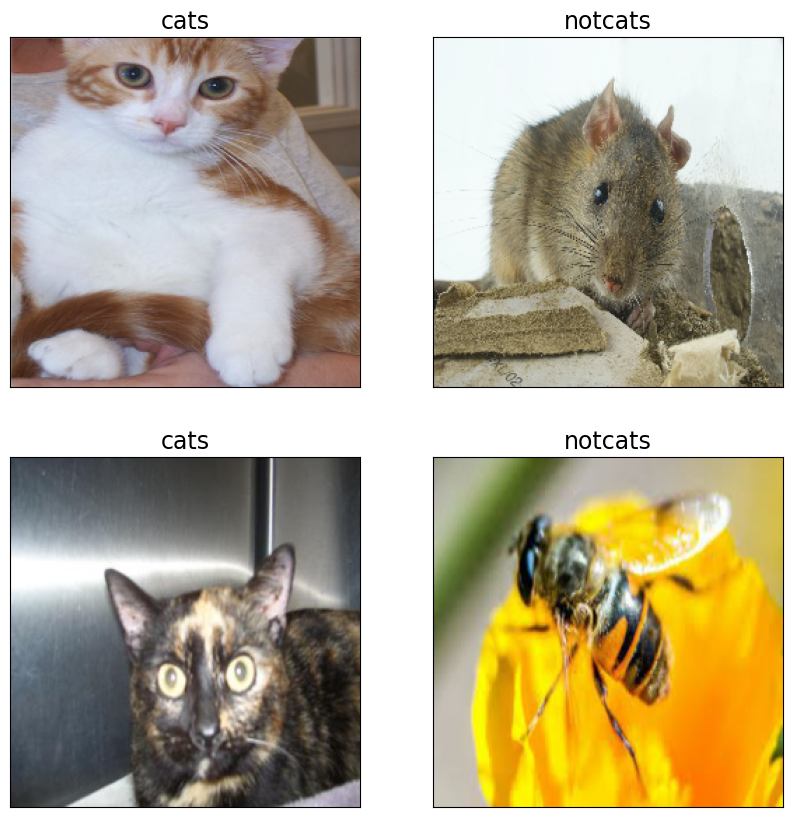

In [40]:
plt.figure(figsize=(10,10))
for i in range(1,5):
  fig = np.random.choice(np.arange(size))
  plt.subplot(2,2,i)
  plt.imshow(image_data[fig])
  plt.title(image_target[fig], fontsize = 17)
  plt.xticks([]),  plt.yticks([])
plt.show()

**Загружаем библиотеки, необходимые для построения нейронной сети:**

In [41]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [42]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

**Разделяем данные на тестовую и обучающую выборки в соотношении 20%/80%**

In [43]:
X = image_data
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=123)

**Строим модель - многослойную сверточную нейронную сеть**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(35, (3,3), activation = 'relu', input_shape = (width, heigth, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

**Запускаем обучение нейронной сети на 10 эпохах, в качестве данных выбирем тестовую выборку**

In [ ]:
model.compile(optimizer='adam',
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
 metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
25/25 [==============================] - 145s 6s/step - loss: 204.0914 - accuracy: 0.5850 - val_loss: 0.6596 - val_accuracy: 0.6100
Epoch 2/10
25/25 [==============================] - 129s 5s/step - loss: 0.4945 - accuracy: 0.7837 - val_loss: 0.7606 - val_accuracy: 0.5650
Epoch 3/10
25/25 [==============================] - 135s 5s/step - loss: 0.2650 - accuracy: 0.8963 - val_loss: 1.2801 - val_accuracy: 0.5900
Epoch 4/10
25/25 [==============================] - 127s 5s/step - loss: 0.1022 - accuracy: 0.9638 - val_loss: 1.2146 - val_accuracy: 0.6300
Epoch 5/10
25/25 [==============================] - 131s 5s/step - loss: 0.0847 - accuracy: 0.9800 - val_loss: 1.6532 - val_accuracy: 0.6250
Epoch 6/10
25/25 [==============================] - 127s 5s/step - loss: 0.0379 - accuracy: 0.9875 - val_loss: 1.8230 - val_accuracy: 0.6650
Epoch 7/10
25/25 [==============================] - 137s 6s/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 2.4110 - val_accuracy: 0.6400
Epoch 8/10


**Получаем в результате точность = 0.6**

In [ ]:
result = model.evaluate(test_images, test_labels)

7/7 [==============================] - 10s 1s/step - loss: 3.0433 - accuracy: 0.6650


**Визуализируем ошибки в виде тепловой карты**

7/7 [==============================] - 7s 946ms/step


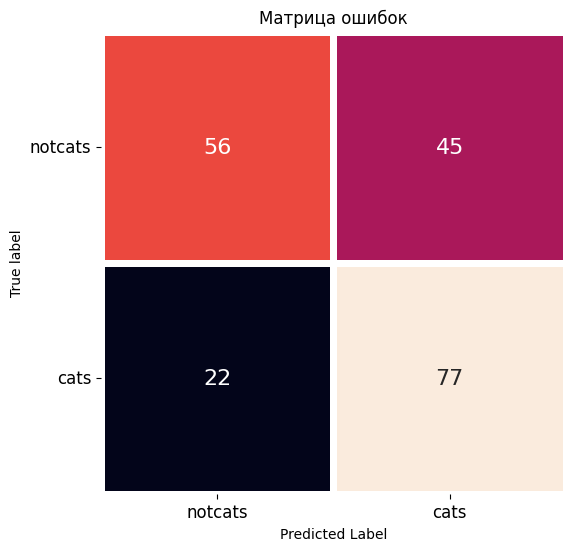

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(test_images)

def toClass(pred):

  class_ = np.zeros(len(pred))
  for i in range(len(pred)):
    index = pred[i].argmax()
    class_[i] = index

  return class_

cm = confusion_matrix(test_labels, toClass(y_pred))

df1 = pd.DataFrame(columns=["notcats", "cats"], index = ["notcats", "cats"], data = cm)

f, ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot = True, fmt = '.0f', ax=ax, linewidths= 5, cbar = False, annot_kws = {"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True label")
plt.title ("Матрица ошибок", size = 12)
plt.show()

In [ ]:
def Prediction(image):
 global width, heigth, files, labels
 img = cv2.resize(image,(width,heigth))
 test = img
 pred = model.predict(np.array([image])).argmax()
 return labels.inverse_transform([pred])[0]

**Визуализируем результат классификации**

1/1 [==============================] - 0s 57ms/step


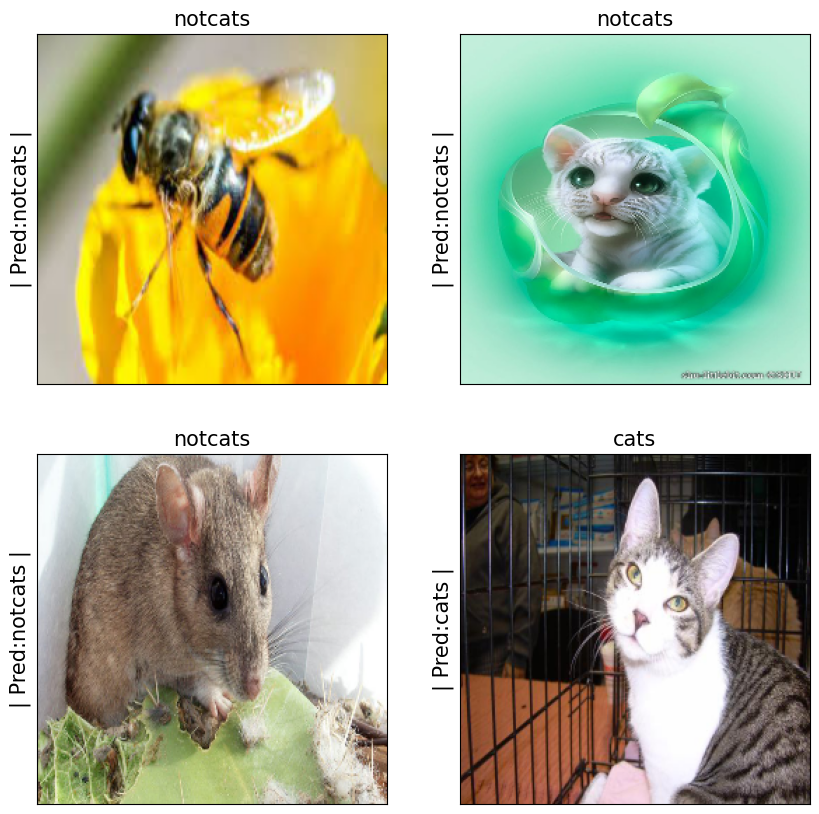

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1,5):
 fig = np.random.choice(np.arange(size))
 plt.subplot(2,2,i)
 plt.imshow(image_data[fig])
 plt.title(image_target[fig], fontsize = 15)
 plt.ylabel("| Pred:{} |".format(Prediction(image_data[fig])), fontsize=15)
 plt.xticks([]), plt.yticks([])
plt.show()